In [50]:
import sys
sys.path.append('/home/paxml-user/')
from processingNetwork.ProcessingNetwork import ProcessingNetwork
from processingNetwork.ProcessingNode import ProcessingNode


# Data Processing Example
## 1 First we will generate some data we want to process

In [51]:
import numpy as np
data = np.random.rand(40,1)
data

array([[ 0.74822285],
       [ 0.88616674],
       [ 0.59931156],
       [ 0.66162649],
       [ 0.54646001],
       [ 0.21871201],
       [ 0.47474264],
       [ 0.01833123],
       [ 0.90553543],
       [ 0.94692642],
       [ 0.35485964],
       [ 0.5850247 ],
       [ 0.21617503],
       [ 0.99429779],
       [ 0.28784059],
       [ 0.22575518],
       [ 0.22402134],
       [ 0.95883996],
       [ 0.17266502],
       [ 0.96215549],
       [ 0.59223047],
       [ 0.76795315],
       [ 0.62215867],
       [ 0.47923331],
       [ 0.81540356],
       [ 0.09725186],
       [ 0.17375764],
       [ 0.69503005],
       [ 0.28711185],
       [ 0.44922203],
       [ 0.82243477],
       [ 0.4504871 ],
       [ 0.00868237],
       [ 0.02795227],
       [ 0.52704725],
       [ 0.56230311],
       [ 0.55794324],
       [ 0.72931924],
       [ 0.88039119],
       [ 0.89035259]])

## 2. We create some processing steps for the 5 point moving average of the data points.

In [52]:
class MovingAverage(ProcessingNode):
    def do_init(self):
        pass
    
    def do_process(self,feature):
        feature[self.settings['name']] = None
        
        # Load List from first dependency
        if(len(self.dependencies) > 0 ):
            valueKey = next(iter(self.dependencies)) 
            numericalList = feature[valueKey]
            
            # Moving Average
            tSum = np.sum(numericalList)
            feature[self.settings['name']] = tSum/len(numericalList)
        return feature
    


In [53]:
class PointBuffer(ProcessingNode):
    def do_init(self):
        self.settings['points'] = 5
        self.buffer = []
        pass

    def do_process(self,feature):
        feature[self.settings['name']] = []
        self.buffer.append(feature[self.settings['input']])
        if len(self.buffer) > self.settings['points'] :
            self.buffer.pop(0)
        if len(self.buffer) == self.settings['points']:
            feature[self.settings['name']] = self.buffer.copy()  
        return feature
        


## 3. Create a two node network

In [54]:
p_def = {}

p_def['PointBuffer']= {'name':'PointBuffer', 
             'type': PointBuffer,
             'settings':{'points':10, 'input':'number'}, ######## NOTE: Setting points to 10
             'dependencies':[]}

p_def['MovingAverage']= {'name':'MovingAverage', 
             'type': MovingAverage,
             'settings':{},
             'dependencies':['PointBuffer']}

pn = ProcessingNetwork(p_def)


## 4. Process the points

In [55]:
features = []
for p in data:
    feature = {'number' : p[0]}
    feature = pn.process(feature)
    features.append(feature)
print(len(features))

40


/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [56]:
features

[{'MovingAverage': nan, 'PointBuffer': [], 'number': 0.74822284769599046},
 {'MovingAverage': nan, 'PointBuffer': [], 'number': 0.88616674188691247},
 {'MovingAverage': nan, 'PointBuffer': [], 'number': 0.59931155661236091},
 {'MovingAverage': nan, 'PointBuffer': [], 'number': 0.66162648500037757},
 {'MovingAverage': 0.68835752845112241,
  'PointBuffer': [0.74822284769599046,
   0.74822284769599046,
   0.88616674188691247,
   0.88616674188691247,
   0.59931155661236091,
   0.59931155661236091,
   0.66162648500037757,
   0.66162648500037757,
   0.54646001105997055,
   0.54646001105997055],
  'number': 0.54646001105997055},
 {'MovingAverage': 0.58245536016316879,
  'PointBuffer': [0.88616674188691247,
   0.88616674188691247,
   0.59931155661236091,
   0.59931155661236091,
   0.66162648500037757,
   0.66162648500037757,
   0.54646001105997055,
   0.54646001105997055,
   0.21871200625622211,
   0.21871200625622211],
  'number': 0.21871200625622211},
 {'MovingAverage': 0.50017053905455455,


## 5. Visualize

In [57]:
import pandas as pd
df = pd.DataFrame(features)

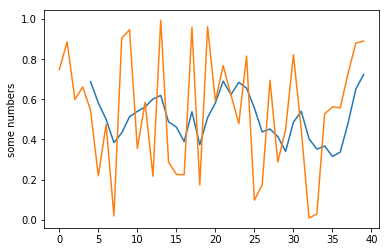

In [58]:
import matplotlib.pyplot as plt
plt.plot(df['MovingAverage'])
plt.plot(df['number'])

plt.ylabel('some numbers')
plt.show()

# 6. Reconfigure as needed:

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


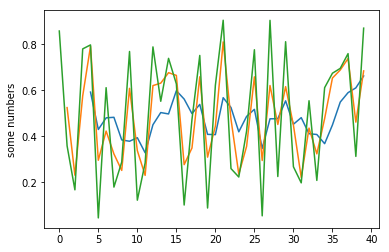

In [49]:
p_def = {}

for i in range(1,20):

    si = str(i)
    p_def['PointBuffer'+ str(i)]= {'name':'PointBuffer', 
                 'type': PointBuffer,
                 'settings':{'points':10, 'input':'number'}, ######## NOTE: Setting points to 10
                 'dependencies':[]}


    p_def['MovingAverage']= {'name':'MovingAverage', 
                 'type': MovingAverage,
                 'settings':{},
                 'dependencies':['PointBuffer']}


pn = ProcessingNetwork(p_def)

features = []
for p in data:
    feature = {'number' : p[0]}
    feature = pn.process(feature)
    features.append(feature)

df = pd.DataFrame(features)

plt.plot(df['MovingAverage'])
plt.plot(df['MovingAverage2'])
plt.plot(df['number'])

plt.ylabel('some numbers')
plt.show()